In [ ]:
import gdown
url = "https://drive.google.com/uc?id=1-CpLBl3W-2I1KBW_W7At-FT5wu9saycr"
output = "data.rar"
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-CpLBl3W-2I1KBW_W7At-FT5wu9saycr
From (redirected): https://drive.google.com/uc?id=1-CpLBl3W-2I1KBW_W7At-FT5wu9saycr&confirm=t&uuid=99d6c7b7-3e2d-45df-80fb-a9fa9de7a28f
To: /content/data.rar
100%|██████████| 24.0M/24.0M [00:00<00:00, 77.7MB/s]


'data.rar'

In [ ]:
!pip install pyunpack patool


In [ ]:
from pyunpack import Archive
import os

input_file = "data.rar"
output_dir = "unzip_data"

os.makedirs(output_dir, exist_ok=True)
Archive(input_file).extractall(output_dir)

print("Giải nén hoàn tất!")


Giải nén hoàn tất!


In [ ]:
import torch
import random
import numpy as np
# Kiểm tra GPU có khả dụng không
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
'''if device.type == 'cpu':
    raise RuntimeError("No GPU found")'''

print(f'Using device: {device}')

# Đặt random seed
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)

Using device: cuda


In [ ]:
import os
import glob
from sklearn.model_selection import train_test_split

# Đường dẫn dữ liệu
data_path = "/content/unzip_data/results"

# Lấy danh sách tất cả các tệp và nhãn
data = []
data_labels = []
categories = []
category_counts = {}
for label_name in os.listdir(data_path):
    categories.append(label_name)
    label_path = os.path.join(data_path, label_name)
    if os.path.isdir(label_path):
        files = glob.glob(os.path.join(label_path, "*"))
        data.extend(files)
        data_labels.extend([label_name] * len(files))

In [ ]:
# Đọc nội dung của tất cả các file
all_contents = []

for file_path in data:
    with open(file_path, "r") as f:
        content = f.read()
        all_contents.append(content)

# all_contents chứa nội dung của tất cả các file
print("Số lượng file đã đọc:", len(all_contents))
print("Nội dung của file đầu tiên:\n", all_contents[0])


Số lượng file đã đọc: 28124
Nội dung của file đầu tiên:
 Khánh kiệt ở tuổi 20 
Hàn Quốc
Vay nặng lãi để đầu tư vào cổ phiếu, tiền ảo hay bất động sản khiến nhiều người trong độ tuổi 20-30 phải nộp đơn bảo hộ phá sản.
Nửa đầu năm, Hàn Quốc ghi nhận 245 vụ phá sản cá nhân. Con số này tăng vọt lên 322 và 315 vụ vào tháng 7 và tháng 8 vừa qua, chiếm 19,6% tổng số hồ sơ bảo hộ phá sản.
Theo thống kê của tòa án phá sản Seoul, cứ 5 người nộp đơn xin phá sản sẽ có một người ở độ tuổi 20, hoặc tăng thêm 1-2 người nếu tính thêm độ tuổi 30. Năm 2020, người dưới 30 tuổi tuyên bố phá sản chỉ chiếm 10% nhưng nay tăng gấp đôi sau một năm rưỡi.
Nguyên nhân chính được cho là do xu hướng vay nợ để mua cổ phiếu hoặc tiền ảo của nhóm người trẻ. Các luật sư phá sản đang báo cáo số lượng thanh niên Hàn Quốc bị cuốn vào cơn sốt Bitcoin tăng mạnh. "Tôi từng là một người làm công ăn lương chăm chỉ, nhưng đang mang nợ nần chồng chất khi các khoản đầu tư bốc hơi", một nhân viên văn phòng ở độ tuổi 30 đã vay 25 t

In [ ]:
# Đọc tệp danh sách từ
with open('/content/vietnamese_words.txt', 'r', encoding='utf-8') as file:
    words = file.readlines()
    words = [word.strip() for word in words]  # Loại bỏ khoảng trắng/thừa
words = words + [
    "bị", "bởi", "cả", "các", "cái", "cần", "càng", "chỉ", "chiếc", "cho", "chứ", "chưa", "chuyện",
    "có", "có_thể", "cứ", "của", "cùng", "cũng", "đã", "đang", "đây", "để", "đến_nỗi", "đều", "điều",
    "do", "đó", "được", "dưới", "gì", "khi", "không", "là", "lại", "lên", "lúc", "mà", "mỗi", "này",
    "nên", "nếu", "ngay", "nhiều", "như", "nhưng", "những", "nơi", "nữa", "phải", "qua", "ra", "rằng",
    "rất", "rồi", "sau", "sẽ", "so", "sự", "tại", "theo", "thì", "trên", "trước", "từ", "từng",
    "và", "vẫn", "vào", "vậy", "vì", "việc", "với", "vừa"
]
print(words[:10])  # In thử 10 từ đầu tiên


['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy', 'ai đó', 'alô', 'amen', 'anh', 'anh ấy']


In [ ]:
import re
# Danh sách stop words tiếng Việt
stop_words = set(words)
import string
def preprocess_text(text):
    # Chuyển văn bản thành chữ thường
    text = text.lower()

    # Loại bỏ dấu câu
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # Loại bỏ khoảng trắng thừa
    text = re.sub(r'\s+', ' ', text).strip()

    # Tách văn bản thành các từ (tokens)
    tokens = text.split()

    # Đếm tổng số từ ban đầu
    total_tokens = len(tokens)

    # Loại bỏ các từ thuộc danh sách stop words
    tokens = [token for token in tokens if token not in stop_words]

    # Tính phần trăm các từ stop words đã bị loại bỏ
    removed_stop_words_percent = (total_tokens - len(tokens)) / total_tokens * 100

    # Trả về văn bản đã được xử lý và phần trăm từ stop words đã bị loại bỏ
    return ' '.join(tokens), removed_stop_words_percent
texts = [preprocess_text(a)[0] for a in (all_contents)]

In [ ]:
label_to_number = {label: idx for idx, label in enumerate(set(data_labels))}
numeric_labels = [label_to_number[label] for label in data_labels]
print("Label to Number Mapping:", label_to_number)
print("Numeric Labels:", numeric_labels)


Label to Number Mapping: {'du-lich': 0, 'thoi-su': 1, 'phap-luat': 2, 'the-thao': 3, 'khoa-hoc': 4, 'doi-song': 5, 'giai-tri': 6, 'giao-duc': 7, 'suc-khoe': 8, 'kinh-doanh': 9, 'the-gioi': 10, 'bat-dong-san': 11}
Numeric Labels: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [ ]:


from sklearn.model_selection import train_test_split
# Chỉ sử dụng 1.2 data gốc để train cho model (do ít Ram)

texts1, numeric_labels1 = texts[::2], numeric_labels[::2]
texts_1, texts_test, y_1, y_test = train_test_split(texts1, numeric_labels1, test_size=0.2, stratify=numeric_labels1, random_state=42)

texts_train, texts_val, y_train, y_val = train_test_split(texts_1, y_1, test_size=0.2, stratify=y_1, random_state=42)

# train : val : test = 6 : 2 : 2


In [ ]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base')
embeded = AutoModel.from_pretrained('vinai/phobert-base').to(device)


In [ ]:
from torch.utils.data import Dataset

class GetData(Dataset):
  def __init__(self, texts, labels):
    self.texts = texts
    self.labels = labels
  def __len__(self):
    return len(self.texts)
  def __getitem__(self, idx):
    return self.texts[idx], self.labels[idx]



In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AdamW, get_linear_schedule_with_warmup
import torch.nn.functional as F
from tqdm import tqdm

class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),  # Shape: (max_length)
            'attention_mask': encoding['attention_mask'].flatten(),  # Shape: (max_length)
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_dataset = CustomDataset(texts_train, y_train, tokenizer)
val_dataset = CustomDataset(texts_val, y_val, tokenizer)

batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Đi vào xây dựng và train cho PhoBert
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AdamW, get_linear_schedule_with_warmup, RobertaConfig, RobertaForSequenceClassification # Import RobertaConfig and RobertaForSequenceClassification
import torch.nn.functional as F
from tqdm import tqdm

class BERTClassifier(torch.nn.Module):
    def __init__(self, num_labels):
        super(BERTClassifier, self).__init__()
        bert_classifier_config = RobertaConfig.from_pretrained(
            "vinai/phobert-base",
            from_tf=False,
            num_labels = num_labels,
            output_hidden_states=False,
            )
        self.bert_classifier = RobertaForSequenceClassification.from_pretrained(
            "vinai/phobert-base",
            config=bert_classifier_config
            )

    def forward(self, input_ids, attention_mask, labels):
        output = self.bert_classifier(input_ids=input_ids,
                                    token_type_ids=None,
                                    attention_mask=attention_mask,
                                    labels=labels
                                    )
        return output

In [ ]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BERTClassifier(num_labels=12)
model = model.to(device)

optimizer = AdamW(model.parameters(), lr=3e-5, eps=1e-8)
epochs = 20
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:

def train_epoch(model, dataloader, optimizer, device, scheduler):
    model.train()
    total_loss = 0
    total_correct = 0
    total_examples = 0

    for batch in tqdm(dataloader, desc="Training"):
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)

        loss = outputs.loss
        logits = outputs.logits

        _, preds = torch.max(logits, dim=1)
        total_correct += torch.sum(preds == labels)
        total_examples += labels.size(0)

        total_loss += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()
        scheduler.step()

    avg_loss = total_loss / len(dataloader)
    accuracy = total_correct.double() / total_examples

    return avg_loss, accuracy.item()

def eval_model(model, dataloader, device):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_examples = 0

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)

            loss = outputs.loss
            logits = outputs.logits

            _, preds = torch.max(logits, dim=1)
            total_correct += torch.sum(preds == labels)
            total_examples += labels.size(0)

            total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    accuracy = total_correct.double() / total_examples

    return avg_loss, accuracy.item()

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    train_loss, train_acc = train_epoch(model, train_dataloader, optimizer, device, scheduler)
    print(f"Train loss: {train_loss:.4f}, accuracy: {train_acc:.4f}")

    val_loss, val_acc = eval_model(model, val_dataloader, device)
    print(f"Validation loss: {val_loss:.4f}, accuracy: {val_acc:.4f}")

test_dataset = CustomDataset(texts_test, y_test, tokenizer)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

test_loss, test_acc = eval_model(model, test_dataloader, device)
print(f"Test loss: {test_loss:.4f}, accuracy: {test_acc:.4f}")


Epoch 1/20


Training: 100%|██████████| 563/563 [06:40<00:00,  1.41it/s]


Train loss: 0.9093, accuracy: 0.7802


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.30it/s]


Validation loss: 0.4619, accuracy: 0.8751
Epoch 2/20


Training: 100%|██████████| 563/563 [06:36<00:00,  1.42it/s]


Train loss: 0.3415, accuracy: 0.9090


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.33it/s]


Validation loss: 0.3624, accuracy: 0.9089
Epoch 3/20


Training: 100%|██████████| 563/563 [06:36<00:00,  1.42it/s]


Train loss: 0.2290, accuracy: 0.9441


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.33it/s]


Validation loss: 0.4035, accuracy: 0.9031
Epoch 4/20


Training: 100%|██████████| 563/563 [06:36<00:00,  1.42it/s]


Train loss: 0.1564, accuracy: 0.9633


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.29it/s]


Validation loss: 0.4127, accuracy: 0.9236
Epoch 5/20


Training: 100%|██████████| 563/563 [06:36<00:00,  1.42it/s]


Train loss: 0.1201, accuracy: 0.9741


Evaluating: 100%|██████████| 141/141 [00:33<00:00,  4.26it/s]


Validation loss: 0.4527, accuracy: 0.9271
Epoch 6/20


Training: 100%|██████████| 563/563 [06:36<00:00,  1.42it/s]


Train loss: 0.1008, accuracy: 0.9800


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.28it/s]


Validation loss: 0.4765, accuracy: 0.9240
Epoch 7/20


Training: 100%|██████████| 563/563 [06:37<00:00,  1.42it/s]


Train loss: 0.0651, accuracy: 0.9880


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.29it/s]


Validation loss: 0.4945, accuracy: 0.9284
Epoch 8/20


Training: 100%|██████████| 563/563 [06:36<00:00,  1.42it/s]


Train loss: 0.0508, accuracy: 0.9900


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.31it/s]


Validation loss: 0.5239, accuracy: 0.9213
Epoch 9/20


Training: 100%|██████████| 563/563 [06:35<00:00,  1.42it/s]


Train loss: 0.0475, accuracy: 0.9914


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.29it/s]


Validation loss: 0.5011, accuracy: 0.9280
Epoch 10/20


Training: 100%|██████████| 563/563 [06:36<00:00,  1.42it/s]


Train loss: 0.0393, accuracy: 0.9920


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.35it/s]


Validation loss: 0.5167, accuracy: 0.9320
Epoch 11/20


Training: 100%|██████████| 563/563 [06:35<00:00,  1.42it/s]


Train loss: 0.0323, accuracy: 0.9936


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.31it/s]


Validation loss: 0.5467, accuracy: 0.9284
Epoch 12/20


Training: 100%|██████████| 563/563 [06:35<00:00,  1.42it/s]


Train loss: 0.0247, accuracy: 0.9947


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.32it/s]


Validation loss: 0.5491, accuracy: 0.9302
Epoch 13/20


Training: 100%|██████████| 563/563 [06:35<00:00,  1.42it/s]


Train loss: 0.0212, accuracy: 0.9954


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.35it/s]


Validation loss: 0.5316, accuracy: 0.9298
Epoch 14/20


Training: 100%|██████████| 563/563 [06:35<00:00,  1.42it/s]


Train loss: 0.0196, accuracy: 0.9959


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.28it/s]


Validation loss: 0.5475, accuracy: 0.9298
Epoch 15/20


Training: 100%|██████████| 563/563 [06:35<00:00,  1.42it/s]


Train loss: 0.0177, accuracy: 0.9960


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.31it/s]


Validation loss: 0.5201, accuracy: 0.9356
Epoch 16/20


Training: 100%|██████████| 563/563 [06:36<00:00,  1.42it/s]


Train loss: 0.0140, accuracy: 0.9968


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.31it/s]


Validation loss: 0.5364, accuracy: 0.9356
Epoch 17/20


Training: 100%|██████████| 563/563 [06:36<00:00,  1.42it/s]


Train loss: 0.0125, accuracy: 0.9963


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.31it/s]


Validation loss: 0.5543, accuracy: 0.9329
Epoch 18/20


Training: 100%|██████████| 563/563 [06:36<00:00,  1.42it/s]


Train loss: 0.0109, accuracy: 0.9971


Evaluating: 100%|██████████| 141/141 [00:33<00:00,  4.25it/s]


Validation loss: 0.5434, accuracy: 0.9364
Epoch 19/20


Training: 100%|██████████| 563/563 [06:37<00:00,  1.42it/s]


Train loss: 0.0060, accuracy: 0.9970


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.31it/s]


Validation loss: 0.5494, accuracy: 0.9351
Epoch 20/20


Training: 100%|██████████| 563/563 [06:36<00:00,  1.42it/s]


Train loss: 0.0049, accuracy: 0.9978


Evaluating: 100%|██████████| 141/141 [00:32<00:00,  4.29it/s]


Validation loss: 0.5443, accuracy: 0.9360


Evaluating: 100%|██████████| 176/176 [00:41<00:00,  4.26it/s]

Test loss: 0.5182, accuracy: 0.9396


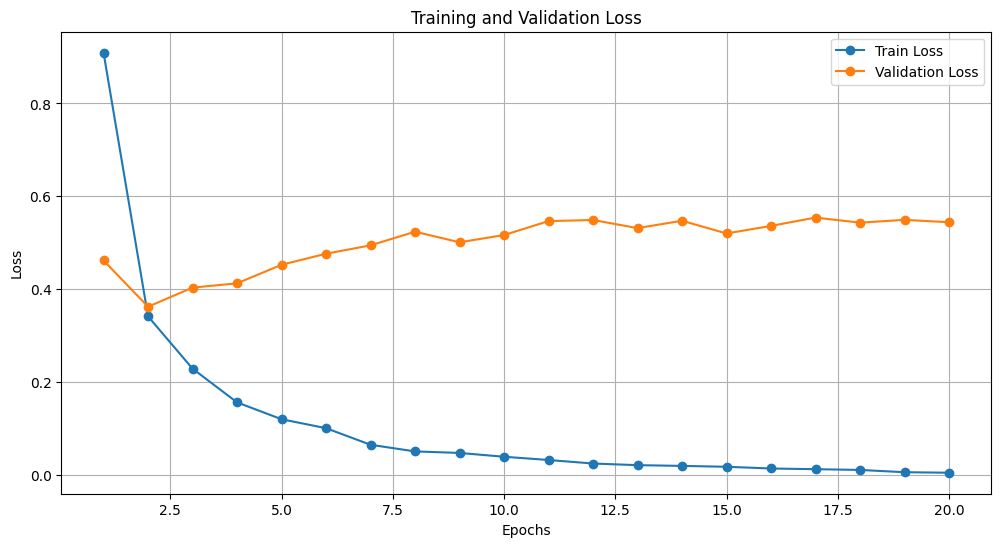

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu từ output
epochs = list(range(1, 21))
train_loss = [0.9093, 0.3415, 0.2290, 0.1564, 0.1201, 0.1008, 0.0651, 0.0508, 0.0475, 0.0393,
              0.0323, 0.0247, 0.0212, 0.0196, 0.0177, 0.0140, 0.0125, 0.0109, 0.0060, 0.0049]
val_loss = [0.4619, 0.3624, 0.4035, 0.4127, 0.4527, 0.4765, 0.4945, 0.5239, 0.5011, 0.5167,
            0.5467, 0.5491, 0.5316, 0.5475, 0.5201, 0.5364, 0.5543, 0.5434, 0.5494, 0.5443]
train_acc = [0.7802, 0.9090, 0.9441, 0.9633, 0.9741, 0.9800, 0.9880, 0.9900, 0.9914, 0.9920,
             0.9936, 0.9947, 0.9954, 0.9959, 0.9960, 0.9968, 0.9963, 0.9971, 0.9970, 0.9978]
val_acc = [0.8751, 0.9089, 0.9031, 0.9236, 0.9271, 0.9240, 0.9284, 0.9213, 0.9280, 0.9320,
           0.9284, 0.9302, 0.9298, 0.9298, 0.9356, 0.9356, 0.9329, 0.9364, 0.9351, 0.9360]

# Vẽ biểu đồ loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, label="Train Loss", marker='o')
plt.plot(epochs, val_loss, label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()



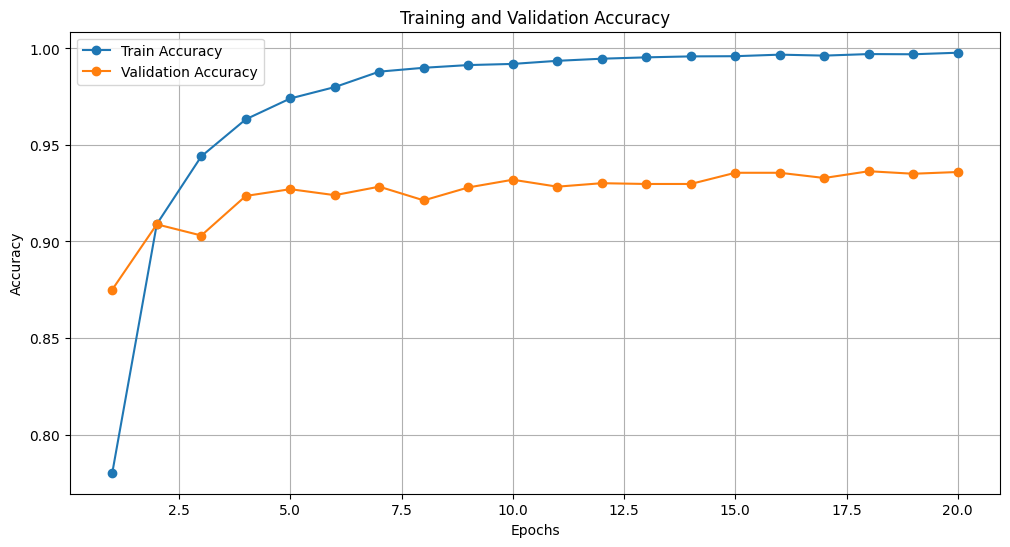

In [ ]:

# Vẽ biểu đồ accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc, label="Train Accuracy", marker='o')
plt.plot(epochs, val_acc, label="Validation Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()